In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("E:\\sukamal sir machine learning\\Python_ML_new-master\\house.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
x=df[["sqft_living"]]
y=df["price"]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [6]:
lr=LinearRegression()


In [7]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred=lr.predict(x_test)

In [9]:
y_pred

array([ 732568.6479807 ,  414950.9054128 ,  617569.12049922, ...,
        319117.96584489, 1384232.63704243,  858520.5114128 ])

In [10]:
lr.score(x_test,y_test)

0.5030774643470591

In [11]:
r2_score(x_test,y_test)

-496689.4114268343

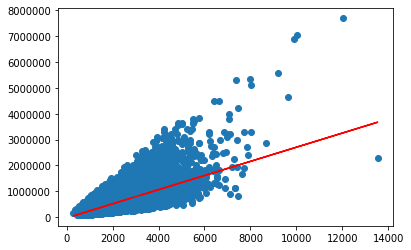

In [12]:
plt.figure()
plt.scatter(x,y)
plt.plot(x_test,y_pred,color="red")
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
pf=PolynomialFeatures(2)

In [15]:
x_poly=pf.fit_transform(x)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [17]:
lr=LinearRegression()


In [18]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
lr.score(x_test,y_test)

0.5030774643470591

In [20]:
for i in range(10):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_test,y_test)
    print(lr.score(x_test,y_test))

-0.0004076018354877142
0.5030774643470591
0.5311574735206945
0.5401886537626621
0.49214803209446734
0.11308496899509057
0.4854899777193526
-28.423332491402647
-728.2333975416379
-6988.887386072883


In [21]:
corr=df.corr()["price"] >0.6

In [22]:
corr

id               False
price             True
bedrooms         False
bathrooms        False
sqft_living       True
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade             True
sqft_above        True
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
Name: price, dtype: bool

# multiple polynomila regression 

In [23]:
y=df[["price"]]
x=df[["sqft_living","grade","sqft_above"]]

In [34]:
x_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(X_test)

In [25]:
for i in range(10):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_test,y_test)
    print(lr.score(x_test,y_test))

-0.0004076018354877142
0.5453418110026687
0.6315684108286737
0.6369558135805837
0.08756440465573223
-6.633464696636336
-124.22888747112682
-2241.55922251236
-135454.5801818953
-185320.47160294405


In [26]:
cor=df.corr()["price"]

In [27]:
cor

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [28]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [29]:
# fun for polynomial regression 
def model(X,y,i):
    pf=PolynomialFeatures(i)
    x_poly=pf.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_test,y_test)
    print(lr.score(x_test,y_test))

In [30]:
for i in range (5):
    result=model(df[["id","date","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode",]],df[["price"]],i)
    

-0.0004076018354877142
0.5453418110026687
0.6315684108286737
0.6369558135805837
0.08756440465573223


In [37]:
pf=PolynomialFeatures(3)
x_poly=pf.fit_transform(x)
x_train_poly,x_test_poly,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
lr.score(x_test_poly,y_test)
y_pred_poly=lr.predict(x_test_poly)

print(lr.score(x_test_poly,y_test))

0.5401886537626621


In [33]:
x=df[['sqft_living']]
y=df['price']

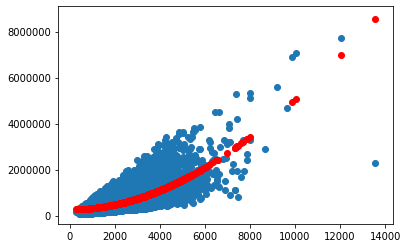

In [38]:
plt.figure()
plt.scatter(x,y)
plt.scatter(X_test,y_pred_poly,color="red")
plt.show()